# Pymaceuticals Inc.
---

### Analysis

- When reviewing the data from the multiple assessments done, there are three inferences that can be made from the data. 
The first inference that can be made is that Capomulin is a very effective treatment option for cancer. As time progressed, the tumor size for mouse l509 decreased. 
The second inference from the data has to do with the correlation between the mouse weight and the tumor size. 
There is a positive correlation between the two, so keeping a lower and healthier weight is important in keeping the tumor volume as low as possible. 
The last infereance that can be made from the analysis is that the two most ineffective treatment options for cancer are Infubinol and Ceftamin. 
They did not perform as well as Capomulin and Ramicane and should not be promoted as future treatment options.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
n = len(pd.unique(df['Mouse ID']))
print("Number of mice: ", n)

Number of mice:  249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = df.set_index('Mouse ID')
duplicate_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df = duplicate_df.drop(["g989"])

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the clean DataFrame.
updated_df.reset_index(inplace = True)
n = len(pd.unique(updated_df['Mouse ID']))
print("Number of mice: ", n)

Number of mice:  248


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
reg_summary_df = updated_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
t_mean = reg_summary_df['Tumor Volume (mm3)'].mean()
t_median = reg_summary_df['Tumor Volume (mm3)'].median()
t_stdev = reg_summary_df['Tumor Volume (mm3)'].std()
t_sem = reg_summary_df['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
reg_series_summary_df = pd.DataFrame({'Mean': t_mean, 'Median': t_median,
                                   'Standard Deviation': t_stdev, 'SEM': t_sem})
reg_series_summary_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_df = updated_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

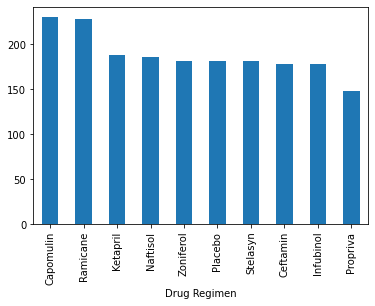

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = updated_df.groupby(['Drug Regimen'])['Timepoint'].count() 
timepoints.sort_values(ascending=False).plot.bar()  
plt.show()

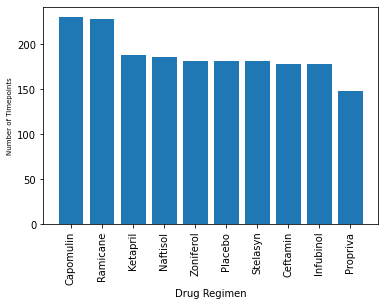

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_plt = timepoints.sort_values(ascending=False)
plt.bar(timepoint_plt.index, timepoint_plt.values)
plt.ylabel('Number of Timepoints', size=7)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='Sex'>

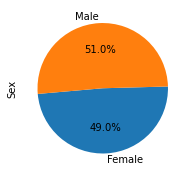

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = updated_df.groupby(['Sex'])['Sex'].count()
mice_sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(3, 3))

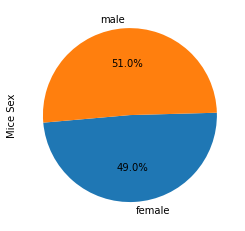

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Mice Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_great_tp = updated_df.groupby(['Mouse ID'])['Timepoint'].max()
last_great_tp = pd.DataFrame(last_great_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(updated_df, last_great_tp, on=('Mouse ID', 'Timepoint'), how='right')

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,483,a262,Placebo,Female,17,29,45,70.717621,4
3,493,a275,Ceftamin,Female,20,28,45,62.999356,3
4,500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,1849,z435,Propriva,Female,12,26,10,48.710661,0
244,84,z578,Ramicane,Male,11,16,45,30.638696,0
245,1859,z581,Infubinol,Female,24,25,45,62.754451,3
246,1869,z795,Naftisol,Female,13,29,45,65.741070,3


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", "Zoniferol", "Ketapril", "Stelasyn", "Propriva", "Placebo", "Naftisol"]

# Create empty list to fill with tumor vol data (for plotting)
t_cap = []
t_ram = []
t_inf = []
t_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        t_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ramicane":
        t_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Infubinol":
        t_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ceftamin":
        t_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": t_cap,"Ramicane": t_ram,"Infubinol": t_inf,"Ceftamin": t_cef})

    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()

print(drug_df_max)
print(drug_df_min)

Capomulin    47.685963
Ramicane     45.220869
Infubinol    72.226731
Ceftamin     68.923185
dtype: float64
Capomulin    23.343598
Ramicane     22.050126
Infubinol    36.321346
Ceftamin     45.000000
dtype: float64


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

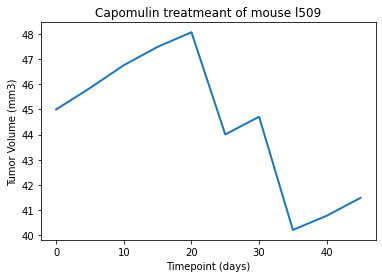

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = updated_df.loc[updated_df["Mouse ID"] == "l509",:]
line_df
# defined the x axis list by calling the timepoints from the l509 dataframe
x_axis = line_df["Timepoint"] 
# defined the y axis
y_axis = line_df["Tumor Volume (mm3)"] 
#set title
plt.title('Capomulin treatmeant of mouse l509')
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axis, y_axis,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

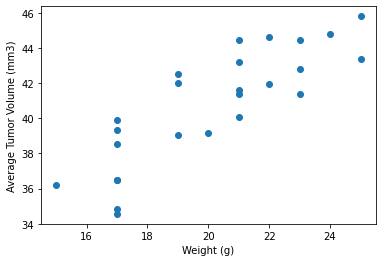

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat_df = updated_df.loc[updated_df["Drug Regimen"] == "Capomulin",:]
#dataframe for mouse weight versus average tumor volume 
scat_avg = scat_df.groupby(['Mouse ID']).mean()
# create scatter plot and set labels
plt.scatter(scat_avg['Weight (g)'],scat_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

